# Cleaning BigMart dataset

In [1]:
# Working with outliers
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 

bigmart = pd.read_csv('bigmart.csv')
print(bigmart.shape)
bigmart.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Plotting the outliers

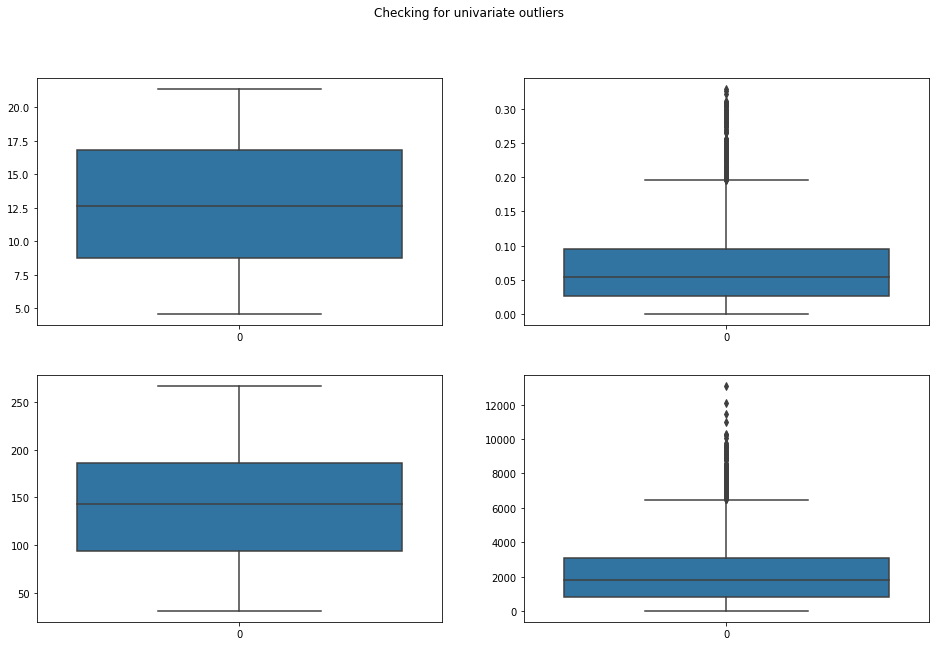

In [2]:
# Univariate outlier is an extreme value of a variable
plt.rcParams['figure.figsize'] = (16, 10)

plt.subplot(2, 2, 1)
sns.boxplot(data = bigmart['Item_Weight'])
plt.subplot(2, 2, 2)
sns.boxplot(data = bigmart['Item_Visibility'])
plt.subplot(2, 2, 3)
sns.boxplot(data = bigmart['Item_MRP'])
plt.subplot(2, 2, 4)
sns.boxplot(data = bigmart['Item_Outlet_Sales'])

plt.suptitle('Checking for univariate outliers')
plt.show()

In [3]:
bigmart['Item_Outlet_Sales'].values[bigmart['Item_Outlet_Sales'].values > 10000] = 10000
# check if there are any values greater than 10000
bigmart[bigmart['Item_Outlet_Sales'] > 10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Let's look at the dataset and clean it manually

In [4]:
bigmart = pd.read_csv('bigmart.csv')
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The number of null values is small for the number of rows.  
We will imput the null values.

In [5]:
bigmart['Item_Weight'] = bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean())
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].fillna(bigmart['Outlet_Size'].mode()[0])
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Again let's check the outliers

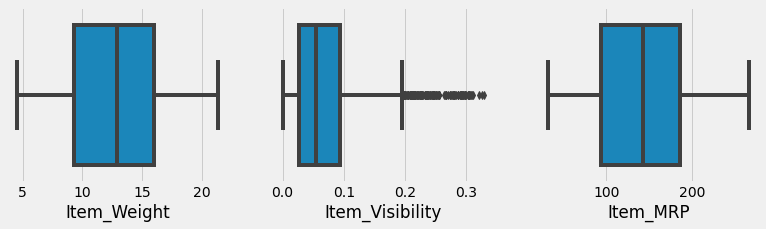

In [6]:
plt.rcParams['figure.figsize'] = (12, 3)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.boxplot(x = bigmart['Item_Weight'])
plt.subplot(1, 3, 2)
sns.boxplot(x = bigmart['Item_Visibility'])
plt.subplot(1, 3, 3)
sns.boxplot(x = bigmart['Item_MRP'])
plt.show()

Let's remove the outliers in Item_Visibility column

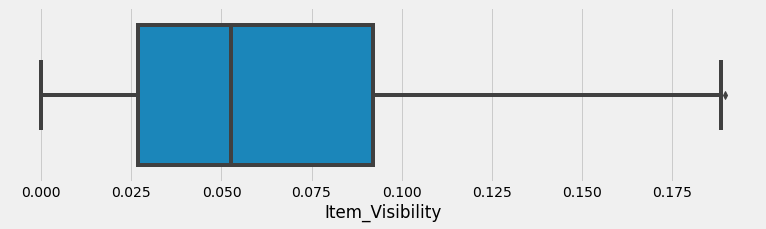

In [7]:
bigmart = bigmart[bigmart['Item_Visibility'] <= 0.19]
sns.boxplot(x = bigmart['Item_Visibility'])
plt.show()

In [8]:
bigmart['Item_Identifier'] = bigmart['Item_Identifier'].apply(lambda x: x[ : 2])
bigmart['Item_Identifier'].value_counts()

FD    6000
NC    1577
DR     786
Name: Item_Identifier, dtype: int64

In [9]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5008
Regular    2825
LF          306
reg         115
low fat     109
Name: Item_Fat_Content, dtype: int64

Remove the duplicates

In [10]:
bigmart['Item_Fat_Content'] = bigmart['Item_Fat_Content'].replace(('low fat', 'LF', 'reg'), 'Low Fat')
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5538
Regular    2825
Name: Item_Fat_Content, dtype: int64